# Use Moving Average to Forecast Revenue

In this project, I created a Python notebook for predicting financial revenue of Bank using Moving Average method.


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Predicting the revenue of a bank based on its historical revenue data from 20009 to 2016. There are so many factors involved but the data we have available to work-on are only the series of revenue records.

- Task is to use Moving Average method to predict future revenus for the bank.



### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
#import packages
import pandas as pd
import os

In [2]:
#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
#apply style function to highlight negative values
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [6]:
#apply style function to highlight max values
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [7]:
#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [8]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [9]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index

df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,"943,690"
2009-02-01,"1,062,565"
2009-03-01,"210,079"
2009-04-01,"-735,286"
2009-05-01,"842,933"


In [10]:
#check datatypes
df.dtypes

Revenue    float64
dtype: object

In [11]:
#check memory usage
df.memory_usage(deep=True)

Index      688
Revenue    688
dtype: int64

---
### Understand the Data

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


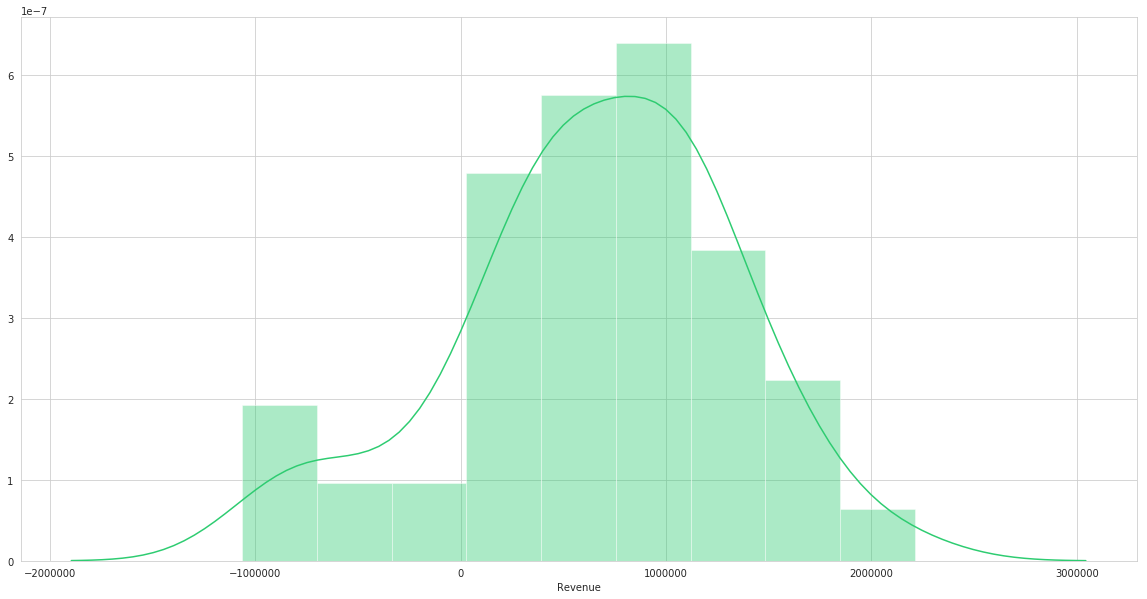

In [13]:
#check the data distribution
sns.distplot(df['Revenue'], color='#2ecc71')

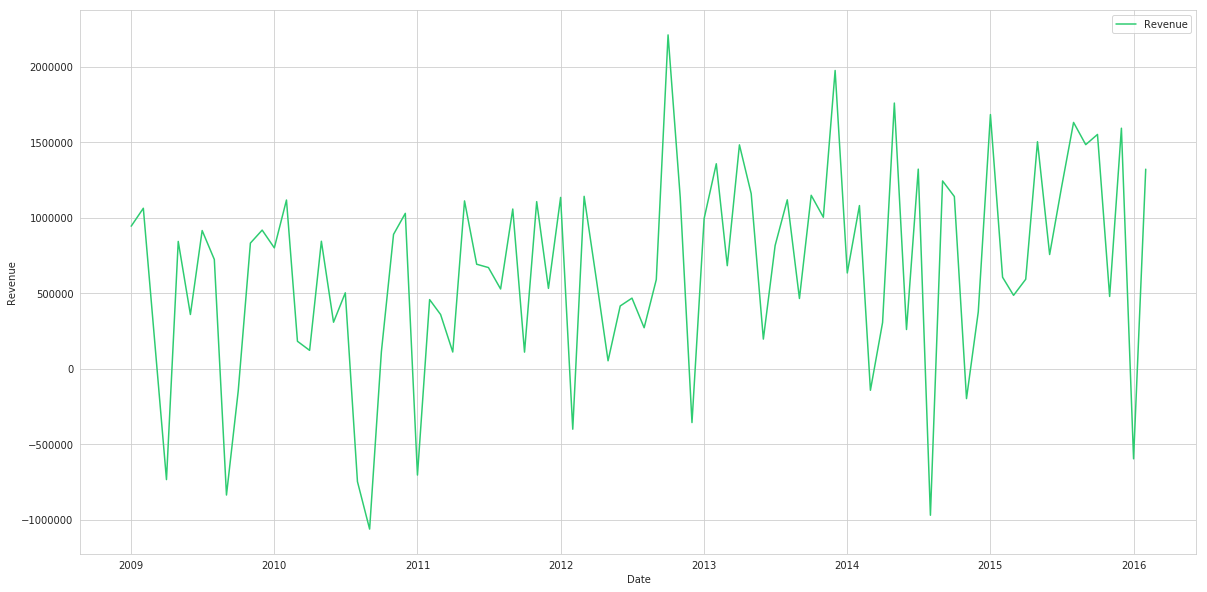

In [14]:
#plot the monthly revenue data
sns.lineplot(df.index,df['Revenue'],color='#2ecc71', label='Revenue')

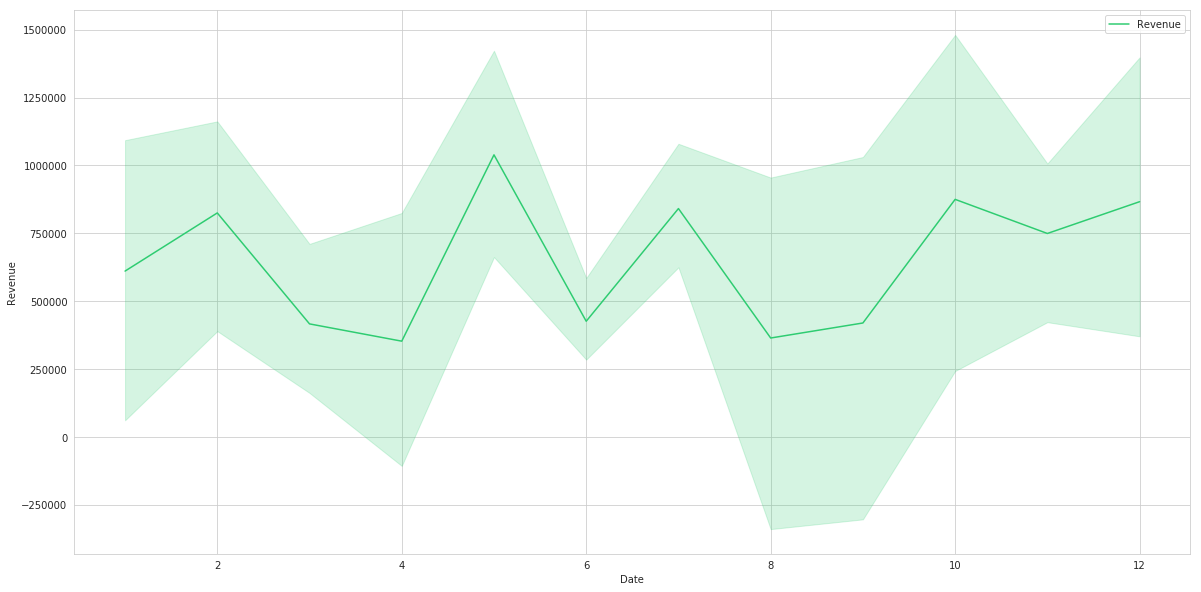

In [15]:
#plot the Monthly Revenue Averages across Y2009- 2016
#Averaging the monthly revenue like all Jan revenues
sns.lineplot(df.index.month,df['Revenue'],color='#2ecc71', label='Revenue')

> Month of May, October and December are high grossers.

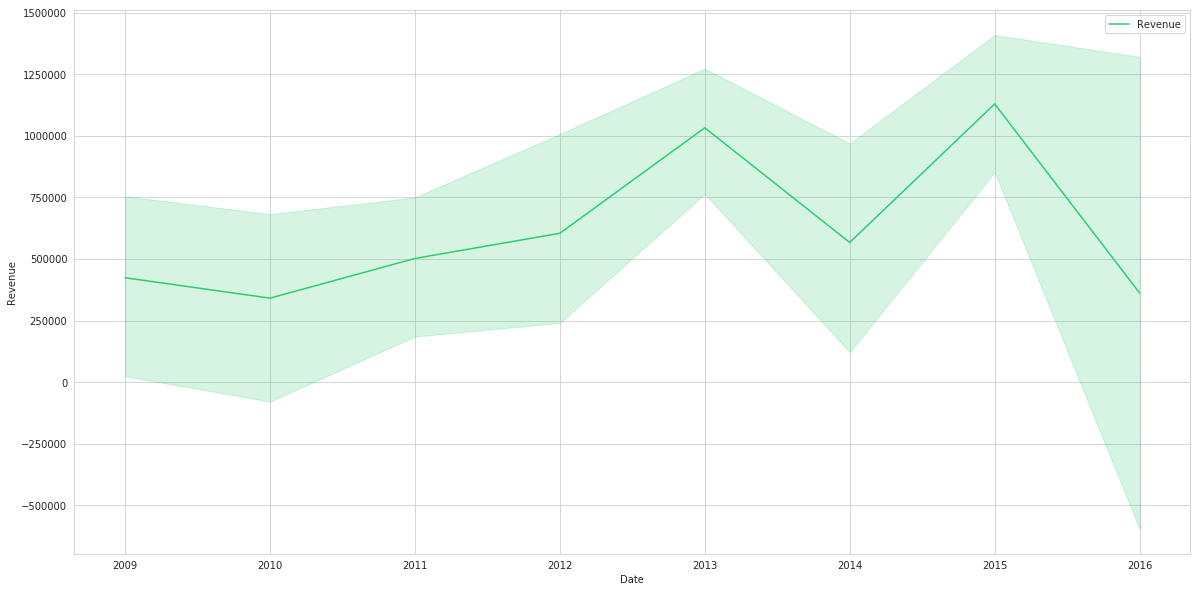

In [16]:
#plot the yearly avg revenues
sns.lineplot(df.index.year,df['Revenue'],color='#2ecc71', label='Revenue')

> 2015 is the best revenue grossing year.

---

### Moving Average